<center><font size = "10"> Week 7 - Connections <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 5
<br>Group member1: Nathan Girard
<br>Group member2: Camil Hamdane
<br>Group member3: Martim Simoes
    
        
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

<font size = "3">For this home work please use the new set of __FIVE__ good morpholgy files corresponding to your group number. 

# Optional: Connect all-to-all with random weights.


<font size='3'>Connect your five cells all to all (unidirectionally) with random weights, as it is done in tutorial 01 of this week, and display the connectivity matrix with the weights.

In [89]:
# Load usefull packages
%matplotlib inline

from neuron import h, gui
import matplotlib.pyplot as plt
import numpy as np
import math as m
from itertools import permutations


In [90]:
class Cell:
    def __init__(self, filename, name, cell_type):
        self.name = name
        self.type = cell_type
        self.synapses = []
        self.build_morphology(filename)
        self.biophysics()

    def build_morphology(self, filename):
        h.load_file("import3d.hoc")
        h.load_file("stdlib.hoc")
        # morph_reader = h.Import3d_Neurolucida3()
        morph_reader = h.Import3d_SWC_read()
        morph_reader.input(filename)
        i3d = h.Import3d_GUI(morph_reader, 0)
        i3d.instantiate(self)

    def biophysics(self):
        for sec in h.allsec():
            sec.Ra = 100  # Axial resistance in Ohm * cm
            sec.cm = 1  # Membrane capacitance in micro Farads / cm^2
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75

        # Insert passive current in the dendrite
        for sec in self.soma:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        if hasattr(self, "apic"):
            for sec in self.apic:
                sec.insert("hh")
                for seg in sec:
                    seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.dend:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.axon:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

In [91]:
# connect two cells with an exponential synapse at given locations
# returns the netcon
def connect(
    source,
    target,
    weight=None,
    delay=5,
    source_sec=None,
    source_neurite="axon",
    target_sec=None,
    target_neurite="dend",
):
    rng = np.random.default_rng()

    if weight is None:
        weight = rng.uniform()  # random weight

    target_neurite_ = getattr(target, target_neurite)
    if target_sec is None:
        target_sec = rng.integers(0, len(target_neurite_))  # random dendritic section

    source_neurite_ = getattr(source, source_neurite)
    if source_sec is None:
        source_sec = rng.integers(0, len(source_neurite_))  # random axonal section

    target_syn = h.ExpSyn(target_neurite_[target_sec](0.5))
    target.synapses.append(target_syn)  # store synapse

    netcon = h.NetCon(
        source_neurite_[source_sec](0.5)._ref_v,
        target_syn,
        sec=source_neurite_[source_sec],
    )
    netcon.weight[0] = weight
    netcon.delay = delay

    print(
        "Connected cells %s -> %s with weight %g and delay %g, from %s[%d] to %s[%d]"
        % (
            source.name,
            target.name,
            weight,
            delay,
            source_neurite,
            source_sec,
            target_neurite,
            target_sec,
        )
    )
    return netcon

In [4]:
DATA_PATH = "Group5/"
EXT = ".swc"
Pyr_ = [Cell(DATA_PATH + "Pyr_0" + str(i) + EXT, "Pyr"+ str(i), "Pyr") for i in np.arange(1,4)]
Int_ = [Cell(DATA_PATH + "Int_0" + str(i) + EXT, "Int"+ str(i), "Int") for i in np.arange(1,3)]

cells = Pyr_ + Int_

In [5]:
# specify connection probabilites between cell types
conn_prob_matrix = np.zeros((2, 2))
conn_prob_matrix[0, 0] = 0.6  # PC to PC
conn_prob_matrix[0, 1] = 0.25  # PC to Inh
conn_prob_matrix[1, 0] = 0.39  # Inh to PC
conn_prob_matrix[1, 1] = 0.37  # Inh to Inh

In [98]:
def random_weights(n):
    rng = np.random.default_rng(3)
    weights = rng.random((n,n))
    np.fill_diagonal(weights, 0.0)
    return weights

weight_matrix = random_weights(5)

netcons = [] # save the netcons in case we want to modify them later

all_neurons = Pyr_+Int_


for i, j in permutations(range(len(Pyr_+Int_), 2)):
    source = all_neurons[i]
    target = all_neurons[j]
    print(source.name, target.name)
    nc = connect(source, target, weight_matrix[i,j])
    netcons.append(nc)

[[0.         0.23681051 0.80127447 0.58216204 0.09412864]
 [0.43312694 0.         0.15973891 0.73457715 0.11367202]
 [0.39122819 0.51674018 0.         0.58679857 0.73783779]
 [0.95626725 0.28420116 0.64854721 0.         0.29272075]
 [0.00149008 0.97346027 0.29840122 0.313986   0.        ]]


ValueError: not enough values to unpack (expected 2, got 0)

# <font color= 'red'>Ex 1:</font> Connect your cells considering connection probability

<font size='3'>Connect your five cells as it is done in tutorial 02, considering the following connection probabilities between cell types:
<br> PC - PC: 60 %
<br> PC - Inh: 25 %
<br> Inh - PC: 39 %
<br> Inh - Inh: 37 %

<font size='3'> Show the results on a connection probability matrix and the connection weight matrix between the five cells. 

<font size='3'><font color= 'red'>[1.5 pt]

In [6]:
netcons = []  # store all netcons

rng = np.random.default_rng()

# PC - PC:
if rng.random() < conn_prob_matrix[0, 0]:
    nc = connect(Pyr_[0], Pyr_[1])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 0]:
    nc = connect(Pyr_[0], Pyr_[2])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 0]:
    nc = connect(Pyr_[1], Pyr_[2])
    netcons.append(nc)
    
# PC - Inh:
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[0], Int_[0])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[0], Int_[1])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[1], Int_[0])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[1], Int_[1])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[2], Int_[0])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[2], Int_[1])
    netcons.append(nc)
    
# Inh - PC:
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[0], Pyr_[0], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[0], Pyr_[1], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[0], Pyr_[2], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[1], Pyr_[0], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[1], Pyr_[1], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[1], Pyr_[2], target_neurite="soma")
    netcons.append(nc)
    
# Inh - Inh:
if rng.random() < conn_prob_matrix[1, 1]:
    nc = connect(Int_[0], Int_[1], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 1]:
    nc = connect(Int_[1], Int_[0], target_neurite="soma")
    netcons.append(nc)

Connected cells Pyr1 -> Pyr2 with weight 0.447811 and delay 5, from axon[46] to dend[32]
Connected cells Pyr1 -> Int1 with weight 0.928777 and delay 5, from axon[56] to dend[23]
Connected cells Pyr2 -> Int2 with weight 0.931069 and delay 5, from axon[68] to dend[2]
Connected cells Int1 -> Pyr2 with weight 0.816996 and delay 5, from axon[47] to soma[0]
Connected cells Int2 -> Pyr1 with weight 0.684017 and delay 5, from axon[116] to soma[0]
Connected cells Int2 -> Int1 with weight 0.47571 and delay 5, from axon[98] to soma[0]


In [7]:
stim_cell = Pyr_[1]
stim_syn = h.ExpSyn(stim_cell.dend[20](0.5))
stim = h.NetStim()  # Make a new stimulator
ncstim = h.NetCon(stim, stim_syn)  # Connect stimulator to synapse

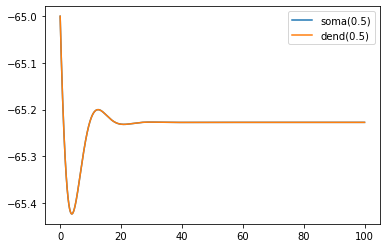

In [8]:
stim.number = 10  # Number of spikes (average)
stim.start = 10  # First spike delay [ms]
ncstim.delay = 1  # NetCon ms
ncstim.weight[0] = 0.8  # NetCon weight

recording_cell = Pyr_[0]

soma_v = h.Vector().record(recording_cell.soma[0](0.5)._ref_v)
dend_v = h.Vector().record(recording_cell.dend[16](0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-65)
h.continuerun(100)
plt.plot(t, soma_v, label="soma(0.5)")
plt.plot(t, dend_v, label="dend(0.5)")
plt.legend()
plt.show()

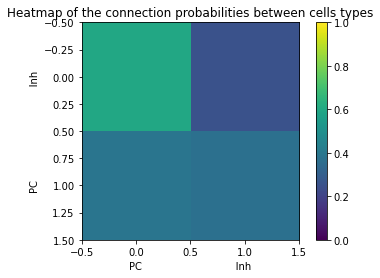

In [9]:
plt.imshow(conn_prob_matrix, cmap="viridis", vmin=0.0, vmax=1.0)
plt.title("Heatmap of the connection probabilities between cells types")
plt.xlabel("PC" + " ".ljust(30) + "Inh")
plt.ylabel("PC" + " ".ljust(30) + "Inh")
plt.colorbar()

# <font color= 'red'>Ex 2:</font>  Distribution of contacts: Convergence Matrix

<font size='3'>

Considering the following mean contact points between cell types: 
- PC_axon - PC_basal: 6
- PC_axon - PC_apical: 1
- PC_axon - Inh_basal: 2
- Inh_axon - PC_soma: 4
- Inh_axon - PC_basal: 3
- Inh_axon - Inh_soma: 5
- Inh_axon - Inh_basal: 1


Following and expanding the implementation from Tutorial 3: connect the neurons by selecting the specific contact points. The connections should follow a __normal distribution__ with the mean value per connection specified by the above values. 
Show the results on a __convergence__ matrix (how many contacts each of the cells receives from the others). 

Stimulate the connected neurons and briefly interpret the relationship between the number of connections and your simulation results.

<font color= 'red'><font size='3'>[2 pts] 

In [74]:

netcons = []
expected_contacts = np.zeros((2, 2, 3), dtype=int)

rng = np.random.default_rng(42)
expected_contacts[0,0,0] = 0 # Pc to Pc (soma)
expected_contacts[0,0,1] = 6 # Pc to Pc (basal)
expected_contacts[0,0,2] = 1 # Pc to Pc (apic)

expected_contacts[1,0,0] = 4 # Inh to Pc  (soma)
expected_contacts[1,0,1] = 3 # Inh to Pc  (basal)
expected_contacts[1,0,2] = 0 # Inh to Pc  (apic)

expected_contacts[0,1,0] = 0 # Pc to Inh (soma)
expected_contacts[0,1,1] = 2 # Pc to Inh (basal)

expected_contacts[1,1,0] = 5 # Inh to Inh (soma)
expected_contacts[1,1,1] = 1 # Inh to Inh (basal)





# Between PC
for k, j in (permutations(list(range(len(Pyr_))), 2)):
    if rng.random() < conn_prob_matrix[0, 0]:
        for i, neurite in enumerate(["soma", "dend", "apic"]):
            contacts = expected_contacts[0, 0, i]
            if contacts > 0:
                contacts = m.floor(rng.normal(contacts))
            if contacts < 0:
                contacts = 0
            for i in range(0, contacts):
                nc = connect(Pyr_[k], Pyr_[j], target_neurite=neurite)
                netcons.append(nc)
    
    
# Between Inh

for k, j in (permutations(list(range(len(Int_))), 2)):
    if rng.random() < conn_prob_matrix[1, 1]:
        for i, neurite in enumerate(["soma", "dend"]):
            contacts = expected_contacts[1, 1, i]
            if contacts > 0:
                contacts = m.floor(rng.normal(contacts))
            if contacts < 0:
                contacts = 0
            for i in range(0, contacts):
                nc = connect(Int_[k], Int_[j], target_neurite=neurite)
                netcons.append(nc)

# Between Pyr and Inh

for k in range(len(Pyr_)):
    for j in range(len(Int_)):
        if rng.random() < conn_prob_matrix[0,1]:
            for i,neurite in enumerate(['soma','dend']):
                contacts = expected_contacts[0,1,i]
                if contacts > 0:
                    contacts = m.floor(rng.normal(contacts))
                if contacts < 0:
                    contacts = 0
                for i in range(0,contacts):
                    nc = connect(Pyr_[k], Int_[j], target_neurite=neurite)
                    netcons.append(nc)

                    
# Between Inh and Pyr                    
                    
for k in range(len(Pyr_)):
    for j in range(len(Int_)):           
        if rng.random() < conn_prob_matrix[1,0]:
                for i,neurite in enumerate(['soma','dend','apic']):
                    contacts = expected_contacts[1,0,i]
                    if contacts > 0:
                        contacts = m.floor(rng.normal(contacts))
                    if contacts < 0:
                        contacts = 0
                    for i in range(0,contacts):
                        nc = connect(Int_[j], Pyr_[k], target_neurite=neurite)
                        netcons.append(nc)     
    

Connected cells Pyr1 -> Pyr3 with weight 0.572383 and delay 5, from axon[60] to dend[9]
Connected cells Pyr1 -> Pyr3 with weight 0.933604 and delay 5, from axon[64] to dend[19]
Connected cells Pyr1 -> Pyr3 with weight 0.614674 and delay 5, from axon[44] to dend[19]
Connected cells Pyr1 -> Pyr3 with weight 0.315057 and delay 5, from axon[81] to dend[12]
Connected cells Pyr1 -> Pyr3 with weight 0.773354 and delay 5, from axon[87] to dend[18]
Connected cells Pyr1 -> Pyr3 with weight 0.0864446 and delay 5, from axon[85] to dend[26]
Connected cells Pyr1 -> Pyr3 with weight 0.0100432 and delay 5, from axon[44] to apic[11]
Connected cells Pyr2 -> Pyr1 with weight 0.178623 and delay 5, from axon[125] to dend[6]
Connected cells Pyr2 -> Pyr1 with weight 0.180267 and delay 5, from axon[22] to dend[11]
Connected cells Pyr2 -> Pyr1 with weight 0.606825 and delay 5, from axon[46] to dend[2]
Connected cells Pyr2 -> Pyr1 with weight 0.910833 and delay 5, from axon[5] to dend[15]
Connected cells Pyr2 -

['Pyr1', 'Pyr2', 'Pyr3', 'Int1', 'Int2']


/tmp/ipykernel_99/1746570291.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + cellnames)
/tmp/ipykernel_99/1746570291.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + cellnames)


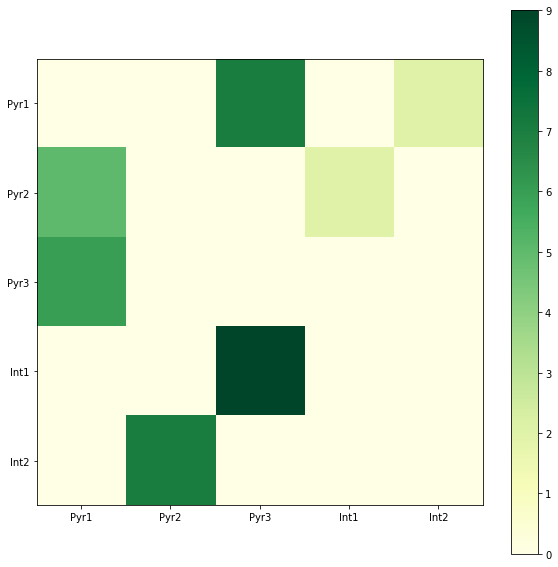

In [47]:
contacts_matrix = np.zeros((5,5))
cellnames = [x.name for x in Pyr_ + Int_]
print(cellnames)

# iterate over netcons and count
for nc in netcons:
    pre = nc.precell().name
    pos = nc.postcell().name
    ipre = cellnames.index(pre)
    ipos = cellnames.index(pos)
    contacts_matrix[ipre,ipos] += 1

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(contacts_matrix, cmap="YlGn")
ax.set_xticklabels([''] + cellnames)
ax.set_yticklabels([''] + cellnames)
plt.colorbar()

plt.show()

## Stimulation test

Here we stimulate Pyr2 which is connected to Pyr1, which itself is connected to Int2.
We then can record both Pyr1 and Int2 to check connectivity.

In [86]:

def stim_and_plot(stim_cell, recording_cells):
    stim_syn = h.ExpSyn(stim_cell.dend[20](0.5))
    stim = h.NetStim()  # Make a new stimulator
    ncstim = h.NetCon(stim, stim_syn)  # Connect stimulator to synapse

    stim.number = 10  # Number of spikes (average)
    stim.start = 10  # First spike delay [ms]
    ncstim.delay = 1  # NetCon ms
    ncstim.weight[0] = 0.8  # NetCon weight

    for recording_cell in recording_cells:
        soma_v = h.Vector().record(recording_cell.soma[0](0.5)._ref_v)
        dend_v = h.Vector().record(recording_cell.dend[10](0.5)._ref_v)
        t = h.Vector().record(h._ref_t)

        h.finitialize(-65)
        h.continuerun(100)
        fig = plt.figure(figsize=(10, 7))
        plt.plot(t, soma_v, label="soma(0.5)")
        plt.plot(t, dend_v, label="dend(0.5)")
        plt.axvline(x = stim.start, color = 'r')
        plt.title("Recording of the " + recording_cell.name + " cell")
        plt.legend()
        plt.show()

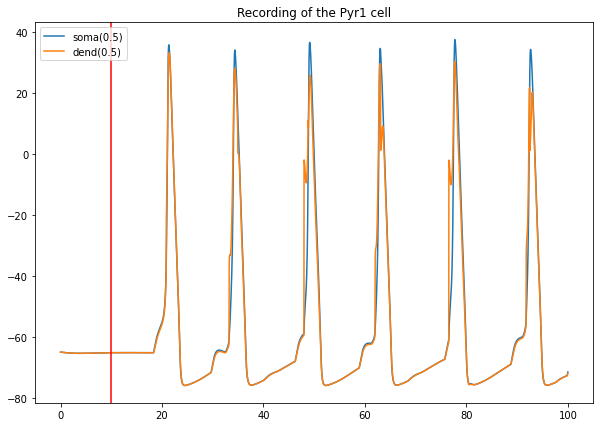

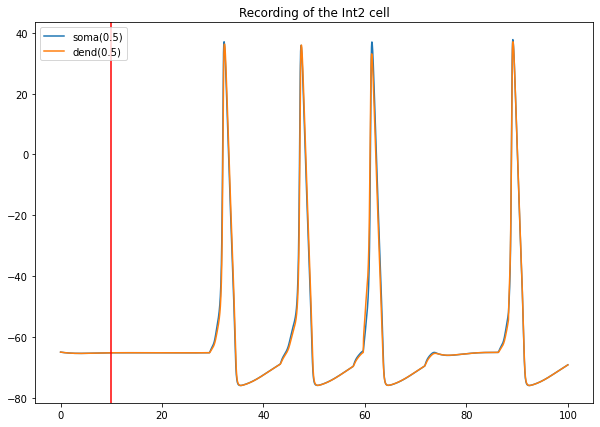

In [87]:
stim_and_plot(Pyr_[1], [Pyr_[0], Int_[1]])

As we can see, stimulating the Pyr2 cells causes the action potential to propagate through the Pyr1 cell, then to the Int2 cell, as setup in the previous part of the exercise.

# <font color='red'>Ex 3:</font> Real Connectivity Rules

<font size='3'>
    
Read the articles uploaded with this homework (Markram_1997.pdf and Gupta_2000.pdf). 

Imagine that you have to build a network with your five cells (3 pyramidals and 2 GABAergic interneurons) from the rat somatosensory cortex. Extract from the papers the data that you would need to connect your cells (connectivity rules). 
Enumerate the data chosen to connect your cells. Make sure to read the papers thoroughly and extract all of the connectivity information.  
    
Using and modifying (if needed) the code from the tutorials, connect your five cells in a more biological way using the connectivity rules found in the papers. Visualize the results of the resulting connectivity.    
    
    
<font size='3'><font color= 'red'>[2.5 pts]

In [1]:
# Load usefull packages
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [2]:
#Cell Class:
class Cell:
    def __init__(self, filename, name, cell_type):
        self.name = name
        self.type = cell_type
        self.synapses = []
        self.build_morphology(filename)
        self.biophysics()

    def build_morphology(self, filename):
        h.load_file("import3d.hoc")
        h.load_file("stdlib.hoc")
        # morph_reader = h.Import3d_Neurolucida3()
        morph_reader = h.Import3d_SWC_read()
        morph_reader.input(filename)
        i3d = h.Import3d_GUI(morph_reader, 0)
        i3d.instantiate(self)

    def biophysics(self):
        for sec in h.allsec():
            sec.Ra = 100  # Axial resistance in Ohm * cm
            sec.cm = 1  # Membrane capacitance in micro Farads / cm^2
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75

        # Insert passive current in the dendrite
        for sec in self.soma:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        if hasattr(self, "apic"):
            for sec in self.apic:
                sec.insert("hh")
                for seg in sec:
                    seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.dend:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.axon:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

In [3]:
#Connect cells in Group 5 file:
Pyr1 = Cell("Group5/Pyr_01.swc", "Pyr1", "Pyr")
Pyr2 = Cell("Group5/Pyr_02.swc", "Pyr2", "Pyr")
Pyr3 = Cell("Group5/Pyr_03.swc", "Pyr3", "Pyr")
Int1 = Cell("Group5/Int_01.swc", "Int1", "Int")
Int2 = Cell("Group5/Int_02.swc", "Int2", "Int")
cells_Pyr = [Pyr1, Pyr2, Pyr3]
cells_Int = [Int1, Int2]
cells = cells_Pyr + cells_Int

In [4]:
for c in cells_Pyr:
    print(
        "%s: %d apical sections, %d basal sections, %d soma sections and %d axon sections"
        % (c.name, len(c.apic), len(c.dend), len(c.soma), len(c.axon))
    )
for c in cells_Int:
    print(
        "%s: %d basal sections, %d soma sections and %d axon sections"
        % (c.name, len(c.dend), len(c.soma), len(c.axon))
    )

Pyr1: 27 apical sections, 17 basal sections, 1 soma sections and 89 axon sections
Pyr2: 149 apical sections, 119 basal sections, 1 soma sections and 131 axon sections
Pyr3: 13 apical sections, 34 basal sections, 1 soma sections and 169 axon sections
Int1: 29 basal sections, 1 soma sections and 175 axon sections
Int2: 53 basal sections, 1 soma sections and 224 axon sections


In [5]:
# connect two cells with an exponential synapse at given locations
# returns the netcon
def connect(
    source,
    target,
    weight=None,
    delay=5,
    source_sec=None,
    source_neurite="axon",
    target_sec=None,
    target_neurite="dend",
):
    rng = np.random.default_rng()

    if weight is None:
        weight = rng.uniform()  # random weight

    target_neurite_ = getattr(target, target_neurite)
    if target_sec is None:
        target_sec = rng.integers(0, len(target_neurite_))  # random dendritic section

    source_neurite_ = getattr(source, source_neurite)
    if source_sec is None:
        source_sec = rng.integers(0, len(source_neurite_))  # random axonal section

    target_syn = h.ExpSyn(target_neurite_[target_sec](0.5))
    target.synapses.append(target_syn)  # store synapse

    netcon = h.NetCon(
        source_neurite_[source_sec](0.5)._ref_v,
        target_syn,
        sec=source_neurite_[source_sec],
    )
    netcon.weight[0] = weight
    netcon.delay = delay

    print(
        "Connected cells %s -> %s with weight %g and delay %g, from %s[%d] to %s[%d]"
        % (
            source.name,
            target.name,
            weight,
            delay,
            source_neurite,
            source_sec,
            target_neurite,
            target_sec,
        )
    )
    return netcon

<font size='3'> 
The following information was extracted from the papers:


Makram et al 1997:

This study about the connection properties between pyramidal cells produced the following results:

- PC <-> PC (biderectional)  : 70%
- PC  -> PC (unidirectional) : 30%
- Number of potential presynaptic contacts: $5.5 \pm 1.1$
- Probability of contact to basal dendrite: 63% => mean number of connections to basal dendrites $3.465 \pm 0.693$
- Probability of contact to apical dendrite: 27% => mean number of connections to apical dendrites $1.485 \pm 0.297$

Gupta et al 2000:

The following information was extracted from this study regarding synaptic properties putative to GABAergic interneurons:

- Found $\approx$ 240 GABAergic connections out of 3000 potential GABAergic connections. The probability of a connection being GABAergic is $p_{IN -> X} \approx 240/3000 = 0.08$ 
- 3 types of synapses F1(13.4%), F2(71.5%), F3(15.1%) 
- 131/179 connections from IN to PC : 
- 48/179  connections from IN to IN : 
- Average Synapse number: F1 - $9.3\pm 3.1$; F2 - $16 \pm 5.5$; F3 - $16.7\pm11.9$ 
- Weighted average synapse number based on synapse type: $15.2 \pm 6.1$
- 5 types of interneurons(occurence) BC(19.7%), SBC(14.8%), MC(21.3%), BTC(16.4%), NBC(27.9%);
- Probabilities of connection to somata BC(19%), SBC(5%), MC(70%), BTC(0), NBC(16%);
- Average connection probability to somata weighted over interneuron type = 23.9% = 17.5%(to PC) + 6.4%(to IN)
- Average connection probability to dendrites weighted over interneuron type = 76.1% = 55.7%(to PC) + 20.4%(to IN)





<font color = 'red'> Connection Probabilities
  
<font color = 'black'>  
To calculate the probabilities of connection let us define $N_{IN}$ the number of interneurons, $N_{PC}$ the number of Pyramidal Cells in the network and $ N = N_{PC} + N_{IN} $ the total number of cells. 

Let us assume the the fraction of interneurons in the rat somatosensory cortex is about$\alpha = \frac{N_{IN}}{N} = 0.15$. (see e.g. Markram, H., Toledo-Rodriguez, M., Wang, Y., Gupta, A., Silberberg, G., and Wu, C. Z. (2004). Interneurons of the neocortical inhibitory system. Nat. Rev. Neurosci. 5, 793–807. doi: 10.1038/nrn1519)

Then the connection probabilities are given by the number of connected pairs divided by the number of pairs:

- $P_{IN -> IN} = \frac{N_{IN-> IN}}{\left(\frac{N_{IN} (N_{IN}-1)}{2}\right)}$
- $P_{IN -> PC} = \frac{N_{IN-> PC}}{N_{IN}{N_{PC}}}$


We know from the paper that:

- The number of GABAergic potential connections is $N_{IN}N_{PC} + \left(N_{IN} (N_{IN}-1)\right) = 3000$
- The number of identified GABAergic connections is $N_{IN-> IN} + N_{IN-> PC} = 240$
- The fraction of IN-> X connections is $\frac{N_{IN-> IN}}{N_{IN-> IN} + N_{IN-> PC}} = 48/179$ for X = IN and $\frac{N_{IN-> PC}}{N_{IN-> IN} + N_{IN-> PC}} = 131/179$ for X = PC


From the first bullet point we can extract the value of the total number of cells:
\begin{equation}
    N_{IN}N_{PC} + \left(N_{IN} (N_{IN}-1)\right)  = \alpha(1-\alpha)N^2 + (\alpha^2 N^2 -\alpha N) = 3000
\end{equation}
Yields $N \approx 142$.

Hence the number of IN-IN pairs is $\left(N_{IN} (N_{IN}-1)\right) = 432$ and the number of IN-PC pairs is $N_{IN}{N_{PC}} = 2568$ 

The connection probabilities can be calculated from the 2 subsequent bullet points regarding connection fractions:
$P_{IN-> IN} = 0.2761$ 
$P_{IN-> PC} = 0.0635$ 



There is NO information regarding connection probabilities of PC->PC and PC->IN so we decided to keep the values from the previous exercises and add to them the information found in the papers.
The connection probabilities are thus:

$P_{IN-> IN} = 0.149$ 

$P_{IN-> PC} = 0.068$ 

$P_{PC-> IN} = 0.25$ 

$P_{PC-> PC} = 0.6$ 

In [6]:
a = 0.15
Npos = 3000
N = 0.5 + 0.5*m.sqrt(1+4*Npos/a)
N_inin =a*N*(a*N -1)
N_inpc =a*(1-a)*N*N
print(N)
print(N_inin)
print(N_inpc)

p_inin = 240/N_inin*48/179
p_inpc = 240/N_inpc*131/179
print(p_inin)
print(p_inpc)

141.92224011802386
431.9049143849519
2568.0950856150475
0.14900858905735953
0.06839406339913347


<font color = 'red'> Expected number of contacts
  
<font color = 'black'>  
The expected number of contacts to target neurite is given by the product between the average number of contacts and the probability of contact to the target neurite in question:
    
PC-> PC: mean nr of contacts = $5.5\pm1.1$
- PCaxon -> PCbasal =  $3.465 \pm 0.693$
- PCaxon -> PCapical=  $1.485 \pm 0.297$
- PCaxon -> PCsoma  =  0. (from previous exercise)

PC-> IN: No information given, extract from previous exercise:
- PCaxon -> INsoma = 0
- PCaxon -> INbasal = 2

IN->IN: Mean number of contacts: $(15.2 \pm 6.1)*48/179 = 4.0\pm 1.6 $
- INaxon -> INsoma = $0.956 \pm 0.382$
- INaxon -> INbasal= $3.05 \pm 1.22$

IN->PC: Mean number of contacts: $(15.2 \pm 6.1)*131/179 = 11.2\pm 4.5 $
- INaxon -> PCsoma = $2.67 \pm 1.08$
There is no information on how to divide between apical an basal dendrites so we assumed all basal in accordance with the previous exercise
- INaxon -> PCbasal= $8.52 \pm 3.42 $ 
- INaxon -> PCapical= 0.

In [7]:
1.22/3.05

0.4

In [73]:
##### specify connection probabilites between cell types
conn_prob_matrix = np.zeros((2, 2))
conn_prob_matrix[0, 0] = 0.6  # Pyr to Pyr
conn_prob_matrix[0, 1] = 0.25  # Pyr to Int
conn_prob_matrix[1, 0] = 0.068 # Int to Pyr
conn_prob_matrix[1, 1] = 0.149  # Int to Int

In [77]:
# specify expected number of contacts between cell types, considering target neurite
expected_contacts = np.zeros((2, 2, 3), dtype=float)
# specify error of expected number of contacts between cell types, considering target neurite
expected_contacts_var = np.zeros((2, 2, 3), dtype=float)


expected_contacts[0, 0, 0] = 0.  # Pyr to Pyr (soma)
expected_contacts[0, 0, 1] = 3.465  # Pyr to Pyr (dend)
expected_contacts[0, 0, 2] = 1.485  # Pyr to Pyr (apic)

expected_contacts_var[0, 0, 0] = 0.  # Pyr to Pyr (soma)
expected_contacts_var[0, 0, 1] = 0.693  # Pyr to Pyr (dend)
expected_contacts_var[0, 0, 2] = 0.297  # Pyr to Pyr (apic)



expected_contacts[1, 0, 0] = 2.67  # Int to Pyr (soma)
expected_contacts[1, 0, 1] = 8.52  # Int to Pyr (dend)
expected_contacts[1, 0, 2] = 0.  # Int to Pyr (apic)

expected_contacts_var[1, 0, 0] = 1.08 # Int to Pyr (soma)
expected_contacts_var[1, 0, 1] = 3.42 # Int to Pyr (dend)
expected_contacts_var[1, 0, 2] = 0.  # Int to Pyr (apic)



expected_contacts[0, 1, 0] = 0.  # Pyr to Int (soma)
expected_contacts[0, 1, 1] = 2.  # Pyr to Int (dend)

expected_contacts_var[0, 1, 0] = 1.  # Pyr to Int (soma)
expected_contacts_var[0, 1, 1] = 1.  # Pyr to Int (dend)



expected_contacts[1, 1, 0] = .956 # Int to Int (soma)
expected_contacts[1, 1, 1] = 3.05  # Int to Int (dend)

expected_contacts_var[1, 1, 0] = .382  # Int to Int (soma)
expected_contacts_var[1, 1, 1] = 1.22 # Int to Int (dend)

In [85]:
netcons = []  # store all netcons

rng = np.random.default_rng()

Npyr = len(cells_Pyr)
Nint = len(cells_Int)

print("Connect Pyr -> Pyr \n")
i = 0;
while i < Npyr:
    for j in range(Npyr - 1):
        if rng.random() < conn_prob_matrix[0,0]:
            Source = cells_Pyr[i]
            Target = cells_Pyr[(i+j+1)%Npyr]
            #print("%s -> %s"%(Source.name,Target.name))
            for k, neurite in enumerate(["soma", "dend", "apic"]):
                contacts = expected_contacts[0, 0, k]
                var =      expected_contacts_var[0, 0, k]
                if contacts > 0:
                    contacts = m.floor(rng.normal(contacts,var))
                if contacts < 0:
                    contacts = 0
                print("%s -> %s contacts %s : %i"%(Source.name,Target.name,neurite,contacts))
                for c in range(0, int(contacts)):
                    nc = connect(Source, Target, target_neurite=neurite)
                    netcons.append(nc)
            print("\n")
    i=i+1


print("Connect Pyr -> Int\n")

i = 0;
while i < Npyr:
    for j in range(Nint):
        if rng.random() < conn_prob_matrix[0,1]:
            Source = cells_Pyr[i]
            Target = cells_Int[j]
            #print("%s -> %s"%(Source.name,Target.name))
            for k, neurite in enumerate(["soma", "dend"]):
                contacts = expected_contacts[0, 1, k]
                var      = expected_contacts_var[0, 1, k]
                if contacts > 0:
                    contacts = m.floor(rng.normal(contacts,var))
                if contacts < 0:
                    contacts = 0
                print("%s -> %s contacts %s : %i"%(Source.name,Target.name,neurite,contacts))
                for c in range(0, int(contacts)):
                    nc = connect(Source, Target, target_neurite=neurite)
                    netcons.append(nc)
            print("\n")
    i=i+1
    
print("Connect Int -> Pyr\n")

i = 0;
while i < Nint:
    for j in range(Npyr):
        if rng.random() < conn_prob_matrix[1,0]:
            Source = cells_Int[i]
            Target = cells_Pyr[j]
            #print("%s -> %s"%(Source.name,Target.name))
            for k, neurite in enumerate(["soma", "dend", "apic"]):
                contacts = expected_contacts[1, 0, k]
                var      = expected_contacts_var[1, 0, k]
                if contacts > 0:
                    contacts = m.floor(rng.normal(contacts,var))
                if contacts < 0:
                    contacts = 0
                print("%s -> %s contacts %s : %i"%(Source.name,Target.name,neurite,contacts))
                for c in range(0, int(contacts)):
                    nc = connect(Source, Target, target_neurite=neurite)
                    netcons.append(nc)
            print("\n")
    i=i+1
    
print("Connect Int -> Int \n")
i = 0;
while i < Nint:
    for j in range(Nint - 1):
        if rng.random() < conn_prob_matrix[1,1]:
            Source = cells_Int[i]
            Target = cells_Int[(i+j+1)%Nint]
            #print("%s -> %s"%(Source.name,Target.name))
            for k, neurite in enumerate(["soma", "dend"]):
                contacts = expected_contacts[1, 1, k]
                var =      expected_contacts_var[1, 1, k]
                if contacts > 0:
                    contacts = m.floor(rng.normal(contacts,var))
                if contacts < 0:
                    contacts = 0
                print("%s -> %s contacts %s : %i"%(Source.name,Target.name,neurite,contacts))
                for c in range(0, int(contacts)):
                    nc = connect(Source, Target, target_neurite=neurite)
                    netcons.append(nc)
            print("\n")
    i=i+1

Connect Pyr -> Pyr 

0.0
Pyr1 -> Pyr2 contacts soma : 0
3.465
Pyr1 -> Pyr2 contacts dend : 4
Connected cells Pyr1 -> Pyr2 with weight 0.615324 and delay 5, from axon[3] to dend[57]
Connected cells Pyr1 -> Pyr2 with weight 0.401189 and delay 5, from axon[11] to dend[81]
Connected cells Pyr1 -> Pyr2 with weight 0.0558987 and delay 5, from axon[30] to dend[90]
Connected cells Pyr1 -> Pyr2 with weight 0.29024 and delay 5, from axon[58] to dend[62]
1.485
Pyr1 -> Pyr2 contacts apic : 1
Connected cells Pyr1 -> Pyr2 with weight 0.198254 and delay 5, from axon[2] to apic[127]


0.0
Pyr2 -> Pyr1 contacts soma : 0
3.465
Pyr2 -> Pyr1 contacts dend : 2
Connected cells Pyr2 -> Pyr1 with weight 0.98024 and delay 5, from axon[120] to dend[12]
Connected cells Pyr2 -> Pyr1 with weight 0.988491 and delay 5, from axon[62] to dend[8]
1.485
Pyr2 -> Pyr1 contacts apic : 1
Connected cells Pyr2 -> Pyr1 with weight 0.808725 and delay 5, from axon[71] to apic[12]


0.0
Pyr3 -> Pyr1 contacts soma : 0
3.465
Pyr3 -

In [86]:
contacts_matrix = np.zeros((5,5))
cellnames = [x.name for x in cells]

# iterate over netcons and count
for nc in netcons:
    pre = nc.precell().name
    pos = nc.postcell().name
    ipre = cellnames.index(pre)
    ipos = cellnames.index(pos)
    contacts_matrix[ipre,ipos] += 1

In [87]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

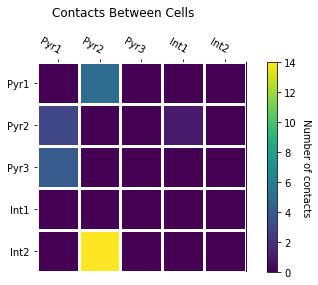

In [88]:
fig, ax = plt.subplots()

im, cbar = heatmap(
    contacts_matrix,
    cellnames,
    cellnames,
    ax=ax,
    cmap="viridis",
    cbarlabel="Number of contacts",
)

fig.suptitle("Contacts Between Cells")
fig.tight_layout()

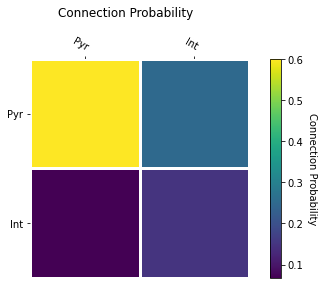

In [90]:
fig, ax = plt.subplots()

im, cbar = heatmap(
    conn_prob_matrix,
    ["Pyr","Int"],
    ["Pyr","Int"],
    ax=ax,
    cmap="viridis",
    cbarlabel="Connection Probability",
)

fig.suptitle("Connection Probability")
fig.tight_layout()